# Amazon SageMaker Semantic Segmentation Algorithm - v7

In [1]:
dryrun = True
install = False

In [2]:
%%bash -s $install
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

install=$1

if [[ "$install" == True ]] ; then
    cd ~/git/awesome-bash-cli
    pip3 install -e .

    cd ~/git/notebooks-and-scripts
    pip3 install -e .

    pip3 install 'sagemaker>=2,<3'
fi

🔋 gpu: not found.
🚀 abcli-7.2675.1.2023-06-aws-batch-a


In [3]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

import sagemaker
import time
from abcli import path
from abcli import fullname
from abcli import string
from abcli.modules.objects import unique_object
from notebooks_and_scripts.sagesemseg.model import SageSemSegModel
from roofAI.logger import logger

logger.info(f"{fullname()}, built on {string.pretty_date()}")

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/kamangir/Library/Application Support/sagemaker/config.yaml


Found credentials in environment variables.
Couldn't call 'get_role' to get Role ARN from role name shamim to get Role path.
sagemaker role: arn:aws:iam::120429650996:role/service-role/AmazonSageMaker-ExecutionRole-20231022T170206
abcli-7.2675.1-unknown, built on 06 February 2024, 19:02:20


In [4]:
# sagesemseg upload_dataset - suffix=full-v2
dataset_object_name = "pascal-voc-v1-full-v2"

if dryrun:
    # sagesemseg upload_dataset - suffix=debug-v2 --count 16
    dataset_object_name = "pascal-voc-v1-debug-v2"

logger.info(f"dataset_object_name: {dataset_object_name}")
model_object_name = unique_object("sagesemseg-model")

dataset_object_name: pascal-voc-v1-debug-v2
📂 sagesemseg-model-2024-02-06-19-02-20-56638


In [5]:
model = SageSemSegModel()

Same images used for training and inference. Defaulting to image scope: inference.
Defaulting to the only supported framework/algorithm version: 1.
Ignoring unnecessary instance type: None.
SageSemSegModel init took 051 millisecond(s), image: 469771592824.dkr.ecr.ca-central-1.amazonaws.com/semantic-segmentation:1


In [6]:
assert model.train(
    dataset_object_name=dataset_object_name,
    model_object_name=model_object_name,
)

SageSemSegModel.train: pascal-voc-v1-debug-v2 -> sagesemseg-model-2024-02-06-19-02-20-56638
pascal-voc-v1-debug-v2.metadata: {
    "bucket": "kamangir",
    "channel": {
        "label_map": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/label_map/train_label_map.json",
        "train": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/train",
        "train_annotation": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/train_annotation",
        "validation": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/validation",
        "validation_annotation": "s3://kamangir/bolt/pascal-voc-v1-debug-v2/validation_annotation"
    },
    "num": {
        "train": 16,
        "val": 16
    },
    "prefix": "bolt/pascal-voc-v1-debug-v2"
}
Creating training-job with name: sagesemseg-model-2024-02-06-19-02-20-56-2024-02-07-03-02-21-098


2024-02-07 03:02:22 Starting - Starting the training job......
2024-02-07 03:02:58 Starting - Preparing the instances for training...
2024-02-07 03:03:55 Downloading - Downloading input data...
2024-02-07 03:04:16 Downloading - Downloading the training image.....................
2024-02-07 03:08:03 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
Nvidia gpu devices, drivers and cuda toolkit versions (only available on hosts with GPU):
Wed Feb  7 03:08:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.12             Driver Version: 535.104.12   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         

Creating model with name: sagesemseg-model-2024-02-06-19-02-20-56-2024-02-07-03-09-54-431
Creating endpoint-config with name sagesemseg-model-2024-02-06-19-02-20-56-2024-02-07-03-09-54-431
Creating endpoint with name sagesemseg-model-2024-02-06-19-02-20-56-2024-02-07-03-09-54-431


--------------!

--2024-02-06 19:18:15--  https://github.com/kamangir/blue-bracket/raw/main/images/helmet-1.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kamangir/blue-bracket/main/images/helmet-1.jpg [following]
--2024-02-06 19:18:16--  https://raw.githubusercontent.com/kamangir/blue-bracket/main/images/helmet-1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1385654 (1.3M) [image/jpeg]
Saving to: ‘/Users/kamangir/storage/abcli/sagesemseg-model-2024-02-06-19-02-20-56638/validation/test.jpg’

     0K .......... .......... .......... .......... ..........  3% 13.6M 0s
    50K .......... .......... .....

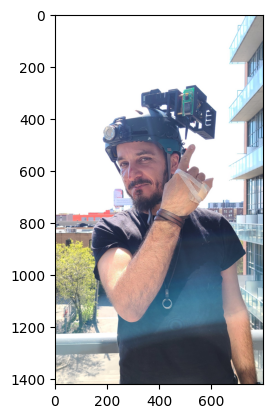

24 second(s) -> 1422x800:uint8: [ 0  1  2  3  4  5  7  9 10 11 12 13 14 15 16 19 20]


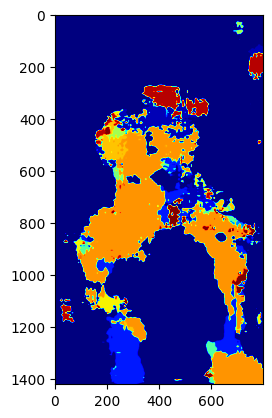

In [7]:
model.deploy(initial_instance_count=1, instance_type="ml.c5.xlarge")

In [9]:
# assert False
model.delete_endpoint()

Deleting endpoint configuration with name: sagesemseg-model-2024-02-06-19-02-20-56-2024-02-07-03-09-54-431
Deleting endpoint with name: sagesemseg-model-2024-02-06-19-02-20-56-2024-02-07-03-09-54-431


In [10]:
%%bash -s $model_object_name
source ~/git/awesome-bash-cli/abcli/.abcli/abcli.sh in_notebook

model_object_name=$1

abcli_upload - $model_object_name

🔋 gpu: not found.
🚀 abcli-7.2675.1.2023-06-aws-batch-a
confirmed: sagesemseg-model-2024-02-06-19-02-20-56638 does not exist.
sagesemseg-model-2024-02-06-19-02-20-56638 open upload started.
upload: ../../../../../storage/abcli/sagesemseg-model-2024-02-06-19-02-20-56638/validation/output.jpg to s3://kamangir/bolt/sagesemseg-model-2024-02-06-19-02-20-56638/validation/output.jpg
upload: ../../../../../storage/abcli/sagesemseg-model-2024-02-06-19-02-20-56638/validation/test_resized.jpg to s3://kamangir/bolt/sagesemseg-model-2024-02-06-19-02-20-56638/validation/test_resized.jpg
upload: ../../../../../storage/abcli/sagesemseg-model-2024-02-06-19-02-20-56638/validation/test.jpg to s3://kamangir/bolt/sagesemseg-model-2024-02-06-19-02-20-56638/validation/test.jpg


sagesemseg-model-2024-02-06-19-02-20-56638 += #open.


In [11]:
# END